In [2]:
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt

from time import process_time
from time import process_time_ns
#from numpy import linalg as lg
#from numpy import random as rd

np.set_printoptions(3)

from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}

div.output_area {
    width: 55%;
}

"""

HTML('<style>{}</style>'.format(CSS))

Problem 01 - For randomly generated matrices $\mathbf{A},\mathbf{B} \in \mathbb{C}^{N \times N}$, create an algorithm to compute the Hadamard Product $\mathbf{A} \odot \mathbf{B}$. Then, compare the run time of your algorithm with the operator .∗ of the software Octave/Matlab. Plot the run time curve as a function of the number of rows/columns N ∈ {2, 4, 8, 16, 32, 64, 128}.

$\color{red}{Solution:}$

The Hadamard Product between two matrices $\mathbf{A},\mathbf{B} \in \mathbb{C}^{N_{1} \times N_{2}}$, also know as element-wise product, can be easily defined by:

\begin{equation}
    \mathbf{A} \odot \mathbf{B} = 
    \begin{pmatrix} 
    a_{11} \cdot b_{11} & \cdots & a_{1N_{2}} \cdot b_{1N_{2}} \\
    \vdots & \ddots & \vdots \\ 
    a_{N_{1}1} \cdot b_{N_{1}1} & \cdots & a_{N_{1}N_{2}} \cdot b_{N_{1}N_{2}} 
    \end{pmatrix}
\end{equation}
    

Although is possible that non quadratic matrices are valide to performe a hadamard product, in this report for the sake of simplicity only quadratic matrices are going to be used in the plotting of asked time curves.

In [4]:
#In this cell an array N is created with the intention to easily change the size of the matrices involved in the following calculations. 
N = np.array([2,4,8,16,32,64,128,256])
Size = len(N)

In [5]:
#In this cell the native function for hadamard product is used to plot a time curve.
elapsed_time01 = np.zeros([Size])
for l in range(0,Size):
    current_time = process_time_ns()
    for i in range(0,100):
        A = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        B = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        C = np.zeros([N[l],N[l]])
        C = A*B

    elapsed_time01[l] = (process_time_ns() - current_time)/100

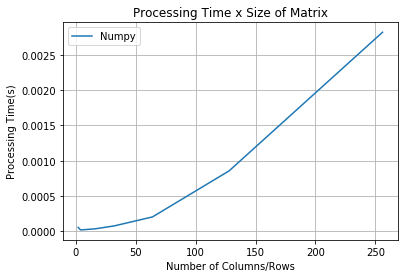

In [6]:
%matplotlib inline
plt.figure()
plt.plot(N,elapsed_time01*10**-9, label = 'Numpy')
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(s)')
plt.legend()
plt.grid()
plt.show()

In [7]:
#In this cell a method proposed by the author is used as a comparative to calculate a time curve.
elapsed_time02 = np.zeros([Size])
for l in range(0,Size):
    current_time = process_time_ns()
    for k in range(0,100):
        A = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        B = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        C = np.zeros([N[l],N[l]]) + 1j*np.zeros([N[l],N[l]])
        for i in range(0,N[l]):
            for j in range(0,N[l]):
                C[i,j] = A[i,j]*C[i,j]
    elapsed_time02[l] = (process_time_ns() - current_time)/100

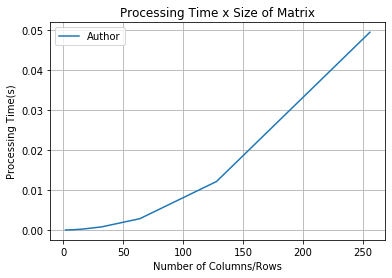

In [8]:
plt.figure()
plt.plot(N,elapsed_time02*10**-9,label = 'Author')
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(s)')
plt.legend()
plt.grid()
plt.show()

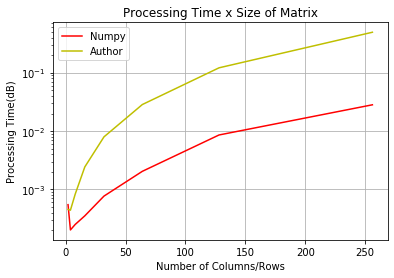

In [9]:
plt.figure()
plt.semilogy(N,10*elapsed_time01*10**-9,'r', label = 'Numpy')
plt.semilogy(N,10*elapsed_time02*10**-9,'y', label = 'Author')
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(dB)')
plt.legend()
plt.grid()
plt.show()

In the picture above is clear that the processing time required to process the operation $\odot$ is far greater in the code proposed by me than the native function used in python. Currently, i can't see a way to overcome this gap.

Problem 02 - For randomly generated matrices $\mathbf{A},\mathbf{B} \in \mathbb{C}^{N \times N}$, create an algorithm to compute the Kronecker Product **A $\otimes$ B**. Then, compare the run time of your algorithm with the operator kron($\mathbf{A}$, $\mathbf{B}$) of the software Octave/Matlab. Plot the run time curve as a function of the number of rows/columns N ∈ {2, 4, 8, 16, 32, 64, 128}.

$\color{red}{Solution:}$

The Kronecker Product between two matrices $\mathbf{A} \in \mathbb{C}^{N_{1} \times N_{2}}$ and $\mathbf{B} \in \mathbb{C}^{M_{1} \times M_{2}}$ has as result a matrix $\mathbf{C} \in \mathbb{C}^{N_{1}M_{1} \times N_{2}M_{2}}$. This operation can be defined as:

\begin{equation}
    \mathbf{A} \otimes \mathbf{B} = 
    \begin{pmatrix} 
    a_{11} \cdot B & \cdots & a_{1N_{2}} \cdot B \\
    \vdots & \ddots & \vdots \\ 
    a_{N_{1}1} \cdot B & \cdots & a_{N_{1}N_{2}} \cdot B 
    \end{pmatrix}
\end{equation}



In [10]:
N = np.array([2,4,8,16,32,64])
Size = len(N)

In [11]:
#In this cell the native function for kronecker product is used to plot a time curve.
elapsed_time03 = np.zeros([Size])
for l in range(0,Size):
    current_time = process_time()
    for k in range(0,100):
        A = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        B = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        C = np.kron(A,B)
    elapsed_time03[l] = (process_time() - current_time)/100

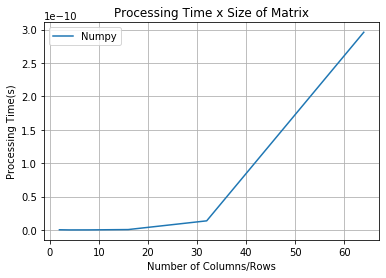

In [12]:
plt.figure()
plt.plot(N,elapsed_time03*10**-9, label = 'Numpy')
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(s)')
plt.legend()
plt.grid()
plt.show()

In [13]:
#In this cell a method proposed by the author is used as a comparative to calculate a time curve.
elapsed_time04 = np.zeros([Size])
for l in range(0,Size):
    current_time = process_time()
    for k in range(0,100):
        A = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        B = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
        C = np.moveaxis(A[:,:,np.newaxis,np.newaxis]*B, 2,1).reshape(N[l]*N[l],N[l]*N[l])
    elapsed_time04[l] = (process_time() - current_time)/100

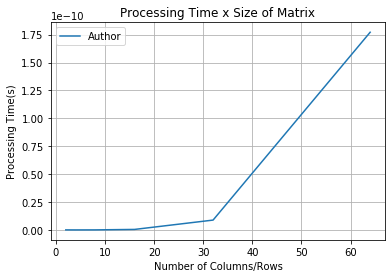

In [14]:
plt.figure()
plt.plot(N,elapsed_time04*10**-9, label = 'Author')
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(s)')
plt.legend()
plt.grid()
plt.show()

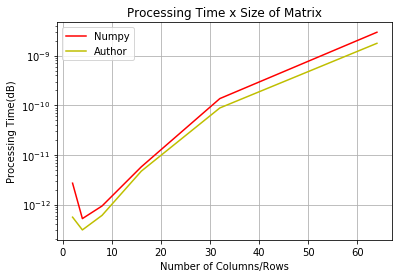

In [15]:
plt.figure()
plt.semilogy(N,10*elapsed_time03*10**-9,'r', label = 'Numpy')
plt.semilogy(N,10*elapsed_time04*10**-9,'y', label = 'Author')
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(dB)')
plt.legend()
plt.grid()
plt.show()

Again, the native function from numpy shows a better performance when compare to the function created by me.

Problem 03 - For randomly generated matrices $\mathbf{A},\mathbf{B} \in \mathbb{C}^{N \times N}$, create an algorithm to compute the Khatri-Rao product $\mathbf{A} \diamond \mathbf{B}$ according with the following prototype function:

$\color{red}{Solution:}$

The Khatri-Rao Product between two matrices $\mathbf{A} \in \mathbb{C}^{N_{1} \times M}$ and $\mathbf{B} \in \mathbb{C}^{N_{2} \times M}$ has as result a matrix $\mathbf{C} \in \mathbb{C}^{N_{1}N_{2} \times M}$. In this operation, is necessary that the two matrices have a matching number of columns. The product is given by:

\begin{equation}
    \mathbf{A} \diamond \mathbf{B} =
    \begin{bmatrix}
        \mathbf{a_{1}} \otimes \mathbf{b_{1}}, & \mathbf{a_{2}} \otimes \mathbf{b_{2}}, & \cdots &, \mathbf{a_{m}} \otimes \mathbf{b_{m}} \\
    \end{bmatrix}
\end{equation}

In [16]:
N = 3
A = np.random.rand(N,N)
B = np.random.rand(N,N)
C = np.zeros([N**2,N])
for i in range(0,N):#Columns of Matrices B and C
    w = 0
    for j in range(0,N):
        for k in range(0,N):
                C[w,i] = A[j,i]*B[k,i]#Collum-Wise Constraint.
                w = w+1
 
print('Matrix A:')   
print(A)
print('Matrix B:')
print(B)
print('Matrix C:')
print(C)

Matrix A:
[[0.873 0.596 0.619]
 [0.706 0.08  0.559]
 [0.127 0.715 0.057]]
Matrix B:
[[0.777 0.801 0.616]
 [0.875 0.734 0.965]
 [0.432 0.496 0.216]]
Matrix C:
[[0.678 0.477 0.381]
 [0.764 0.437 0.597]
 [0.377 0.295 0.134]
 [0.548 0.064 0.344]
 [0.617 0.059 0.539]
 [0.304 0.04  0.121]
 [0.099 0.573 0.035]
 [0.111 0.525 0.055]
 [0.055 0.355 0.012]]


In [17]:
N = np.array([2,4,8,16,32,64])
Size = len(N)

In [18]:
elapsed_time05 = np.zeros([Size])
for l in range(0,Size):
    current_time = process_time()
    A = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
    B = np.random.rand(N[l],N[l]) + 1j*np.random.rand(N[l],N[l])
    C = np.zeros([N[l]*N[l],N[l]]) + 1j*np.zeros([N[l]*N[l],N[l]])
    
    for k in range(0,100):
        for i in range(0,N[l]):#Columns of Matrices B and C
            w = 0
            for j in range(0,N[l]):
                for k in range(0,N[l]):
                    C[w,i] = A[j,i]*B[k,i]#Collum-wise.
                    w = w+1
        elapsed_time05[l] = (process_time() - current_time)/100

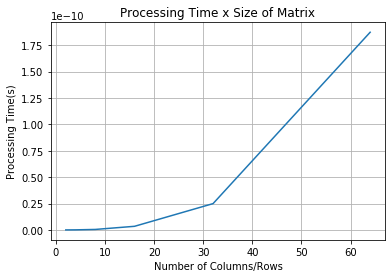

In [19]:
plt.figure()
plt.plot(N,elapsed_time05*10**-9)
plt.title('Processing Time x Size of Matrix')
plt.xlabel('Number of Columns/Rows')
plt.ylabel('Processing Time(s)')
plt.grid()
plt.show()

## About this notebook

**Author**: Kenneth B. dos A. Benício

**Uptaded on**: 2020-03-17